# **Triluxo Technologies Private Limited | AI Developer job**

## **Assignment Title: Custom Chatbot Development and Deployment**

## **Assignment Description: You are tasked with creating a custom chatbot that can suggest technical courses to students based on the information available at the following link : https://brainlox.com/courses/category/technical**

## ***Data Collection and Preparation***

### ***Importing Necessary Libraries***

In [ ]:
import numpy  as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

### ***Scraping the course information (titles, descriptions, and URLs) from the provided link***

In [ ]:
text = requests.get('https://brainlox.com/courses/category/technical')
text

<Response [200]>

In [ ]:
soup = BeautifulSoup(text.content,'html.parser')

In [ ]:
soup

<!DOCTYPE html>
<html lang="zxx"><head><link href="/images/brainLox_logo.jpeg" rel="shortcut icon" type="image"/><meta content="Brainlox" name="application-name"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="Brainlox" name="apple-mobile-web-app-title"/><meta content="#FFFFFF" name="theme-color"/><link href="/images/brainLox_logo.jpeg" rel="brainLox_logo" sizes="180x180"/><link href="/manifest.json" rel="manifest"/><link href="/images/brainLox_logo.jpeg" rel="shortcut icon"/><meta charset="utf-8"/><meta content="initial-scale=1.0, width=device-width" name="viewport"/><meta content="brainlox dev team" name="author"/><title>Brainlox: Learn technical courses.</title><meta content="Your one stop education destination!" name="description"/><meta content="Brainlox: Learn technical courses." name="og:title" property="og:title"/><meta content="article" property="og:type"/><meta content="https://brai

In [ ]:
# Scraping the Title and URL

In [ ]:
title = []
url   = []
for i in soup.find_all('div',class_='container')[1].find_all('div',class_='col-lg-6 col-md-12'):
  title.append(i.find('h3').text.strip())
  url.append('https://brainlox.com'+i.find('h3').find('a').get('href'))

In [ ]:
df = pd.DataFrame()

In [ ]:
df['title'] = title
df['url']   = url

In [ ]:
df

,title,url
0,LEARN SCRATCH PROGRAMING,https://brainlox.com/courses/4f629d96-5ed9-430...
1,LEARN CLOUD COMPUTING BASICS-AWS,https://brainlox.com/courses/872d1cb6-8469-479...
2,LEARN MOBILE DEVELOPMENT,https://brainlox.com/courses/2cf11f62-6452-41f...
3,LEARN CORE JAVA PROGRAMMING ONLINE,https://brainlox.com/courses/be32e068-edca-4b4...
4,LEARN ROBOTICS,https://brainlox.com/courses/0deafb39-3208-42d...
...,...,...
62,Scratch Playground: Create a Space Game!,https://brainlox.com/courses/7472b97e-7b73-42d...
63,Create Your Own Roblox Obstacle Course,https://brainlox.com/courses/5a45c3b4-3f6e-48d...
64,Java Minecraft Creative or Survival Mode,https://brainlox.com/courses/ebe89ac6-5b3a-479...
65,AI Camp for Jobs & Business:Build Your own Cha...,https://brainlox.com/courses/eab79907-4de4-441...


In [ ]:
# Scraping the Description

In [ ]:
description = []
for i in df.values:
  text = requests.get(i[1])
  soup = BeautifulSoup(text.content,'html.parser')
  description.append(soup.find('div',class_='courses-overview').text.strip())

In [ ]:
df['description'] = description

In [ ]:
df

,title,url,description
0,LEARN SCRATCH PROGRAMING,https://brainlox.com/courses/4f629d96-5ed9-430...,Course Description\nScratch Course is the foun...
1,LEARN CLOUD COMPUTING BASICS-AWS,https://brainlox.com/courses/872d1cb6-8469-479...,Course Description\nIn this course we are goin...
2,LEARN MOBILE DEVELOPMENT,https://brainlox.com/courses/2cf11f62-6452-41f...,Course Description\nMobile application develop...
3,LEARN CORE JAVA PROGRAMMING ONLINE,https://brainlox.com/courses/be32e068-edca-4b4...,Course Description\nJava is a very popular hig...
4,LEARN ROBOTICS,https://brainlox.com/courses/0deafb39-3208-42d...,Course Description\nYou can open all kinds of ...
...,...,...,...
62,Scratch Playground: Create a Space Game!,https://brainlox.com/courses/7472b97e-7b73-42d...,Course DescriptionScratch Playground : Create ...
63,Create Your Own Roblox Obstacle Course,https://brainlox.com/courses/5a45c3b4-3f6e-48d...,Course DescriptionRoblox enthusiasts who want ...
64,Java Minecraft Creative or Survival Mode,https://brainlox.com/courses/ebe89ac6-5b3a-479...,Course Description1. Title: Minecraft Java Pro...
65,AI Camp for Jobs & Business:Build Your own Cha...,https://brainlox.com/courses/eab79907-4de4-441...,Course Description🌟Welcome to the Chatbot Mast...


### ***Preprocessing the scraped data***

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

title          0
url            0
description    0
dtype: int64

In [ ]:
df

,title,url,description
0,LEARN SCRATCH PROGRAMING,https://brainlox.com/courses/4f629d96-5ed9-430...,Course Description\nScratch Course is the foun...
1,LEARN CLOUD COMPUTING BASICS-AWS,https://brainlox.com/courses/872d1cb6-8469-479...,Course Description\nIn this course we are goin...
2,LEARN MOBILE DEVELOPMENT,https://brainlox.com/courses/2cf11f62-6452-41f...,Course Description\nMobile application develop...
3,LEARN CORE JAVA PROGRAMMING ONLINE,https://brainlox.com/courses/be32e068-edca-4b4...,Course Description\nJava is a very popular hig...
4,LEARN ROBOTICS,https://brainlox.com/courses/0deafb39-3208-42d...,Course Description\nYou can open all kinds of ...
...,...,...,...
62,Scratch Playground: Create a Space Game!,https://brainlox.com/courses/7472b97e-7b73-42d...,Course DescriptionScratch Playground : Create ...
63,Create Your Own Roblox Obstacle Course,https://brainlox.com/courses/5a45c3b4-3f6e-48d...,Course DescriptionRoblox enthusiasts who want ...
64,Java Minecraft Creative or Survival Mode,https://brainlox.com/courses/ebe89ac6-5b3a-479...,Course Description1. Title: Minecraft Java Pro...
65,AI Camp for Jobs & Business:Build Your own Cha...,https://brainlox.com/courses/eab79907-4de4-441...,Course Description🌟Welcome to the Chatbot Mast...


In [ ]:
# Saving the Scraped Data

In [ ]:
df.to_csv('data.csv',index=False)

In [ ]:
# Data Conversion to make it suitable for chatbot training

In [ ]:
data = ''
for i in df.values:
  data +='Course Name'
  data +='\n'
  data +=i[0]
  data +='\n'
  data +=i[2]
  data +='\n'
  data +='\n'

In [ ]:
data

'Course Name\nLEARN SCRATCH PROGRAMING\nCourse Description\nScratch Course is the foundation of coding and is a building block of a coding journey. If you want to Kickstart your coding journey, scratch programming is the ultimate start. It will not only nourish your thinking skills, but also enhance the idea about how programming in computer works and how the code is written.\n\nMAIN FEATURES OF THE PROGRAM\nOne on One Live Interactive Sessions with verified Instructor\nCustomized Curriculum according to your kid’s progress\nSimple and interesting assignments for easy learning\nClass Tracking Report on a daily basis.\nStrong focus on Learning with Fun\nComplete access to the study materials and PowerPoint Slides.\n\nCourse Name\nLEARN CLOUD COMPUTING BASICS-AWS\nCourse Description\nIn this course we are going to cover the basics and the most important services on AWS,\nAt the end of this course, you will have a solid understanding of AWS and you can start using it for your projects.\n\

In [ ]:
print(data[:1500])

Course Name
LEARN SCRATCH PROGRAMING
Course Description
Scratch Course is the foundation of coding and is a building block of a coding journey. If you want to Kickstart your coding journey, scratch programming is the ultimate start. It will not only nourish your thinking skills, but also enhance the idea about how programming in computer works and how the code is written.

MAIN FEATURES OF THE PROGRAM
One on One Live Interactive Sessions with verified Instructor
Customized Curriculum according to your kid’s progress
Simple and interesting assignments for easy learning
Class Tracking Report on a daily basis.
Strong focus on Learning with Fun
Complete access to the study materials and PowerPoint Slides.

Course Name
LEARN CLOUD COMPUTING BASICS-AWS
Course Description
In this course we are going to cover the basics and the most important services on AWS,
At the end of this course, you will have a solid understanding of AWS and you can start using it for your projects.


MAIN FEATURES OF T

In [ ]:
# Saving the Data

In [ ]:
file = open('data.txt','w')
file.write(data)
file.close()

## ***Model Integration***

### ***Choosing LangChain for ChatBot Creation***

### ***Installing Necessary Libraries***

In [ ]:
!pip install langchain
!pip install openai
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 59.8 MB/s eta 0:00:00


### ***Importing Necessary Libraries***

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

### ***Setting-Up OpenAI_API_Key***

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = #"YOUR-OPENAI-API-KEY"

### ***Defining LangChain***

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type="stuff")

## ***Chatbot Development***

### ***Note : We need to split the data that we have into smaller chunks so that during information retreival we don't hit the token size limits***

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 2000,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(data)

In [ ]:
len(texts)

52

In [ ]:
texts[0]

'Course Name\nLEARN SCRATCH PROGRAMING\nCourse Description\nScratch Course is the foundation of coding and is a building block of a coding journey. If you want to Kickstart your coding journey, scratch programming is the ultimate start. It will not only nourish your thinking skills, but also enhance the idea about how programming in computer works and how the code is written.\nMAIN FEATURES OF THE PROGRAM\nOne on One Live Interactive Sessions with verified Instructor\nCustomized Curriculum according to your kid’s progress\nSimple and interesting assignments for easy learning\nClass Tracking Report on a daily basis.\nStrong focus on Learning with Fun\nComplete access to the study materials and PowerPoint Slides.\nCourse Name\nLEARN CLOUD COMPUTING BASICS-AWS\nCourse Description\nIn this course we are going to cover the basics and the most important services on AWS,\nAt the end of this course, you will have a solid understanding of AWS and you can start using it for your projects.\nMAIN 

In [ ]:
texts[1]

'•\tCustomized Curriculum according to your kid’s progress\n•\tSimple and interesting assignments for easy learning\n•\tClass Tracking Report on daily basis.\n•\tStrong focus on Learning with Fun\n•\tComplete access of the study materials and Power Point Slides.\nCourse Name\nLEARN CORE JAVA PROGRAMMING ONLINE\nCourse Description\nJava is a very popular high-level, class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let application developers write once, run anywhere (WORA), meaning that compiled Java code can run on all platforms that support Java without the need for recompilation. Java applications are typically compiled to bytecode that can run on any Java virtual machine (JVM) regardless of the underlying computer architecture. The syntax of Java is similar to C and C++.\nIn this course, students will understand Programming and Java. We cover basics of Ja

### ***Downloading the Embeddings from OpenAI***

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

### ***Applying Embeddings to the texts chunks***

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.6 MB/s eta 0:00:00


In [ ]:
from langchain.vectorstores import FAISS
docsearch = FAISS.from_texts(texts, embeddings)

In [ ]:
docsearch

### ***Defining LangChain's chain for Chatbot Development***

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type="stuff")

## ***Chatbot Testing***

In [ ]:
query = "I am beginner in Java programming. Suggest me the course that will help me to upgrade my knowledge"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' LEARN CORE JAVA PROGRAMMING ONLINE is a course designed for beginners to learn Java programming. It covers basics of Java, Flow of execution, Data Types and their functions and loops. It also provides practice questions and teaches logic building. Sufficient amount of fundamental knowledge will be provided which is necessary enough to pursue the Intermediate Java Courses.'

In [ ]:
query = "I am working on chatbot creation project. Suggest me the course that will help me to complete the project"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' AI Camp for Jobs & Business: Build Your Own ChatGPT is a great course to help you complete your chatbot creation project. It covers topics such as introduction to chatbots and NLP, designing conversational interfaces, natural language understanding, natural language generation, dialog management and contextual understanding, deep learning for chatbots, and deploying chatbots on messaging platforms. It also includes hands-on experience with practical projects to reinforce your learning.'

## ***Chatbot Deployment (Extra Credit)***

### ***Deploying the Chatbot using Gradio Library***

In [ ]:
# Installing Gradio Library

!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.2 MB/s eta 0:

In [ ]:
# Importing Gradio Library

import gradio

In [ ]:
# Defining the function to suggest relevant courses based on user input.

def course_recommendation(user_input):
  query = str(user_input)
  docs = docsearch.similarity_search(query)
  return chain.run(input_documents=docs, question=query)

In [ ]:
course_recommendation('I am beginner in Python programming. Suggest me the course that will help me to upgrade my knowledge')

' Python Programming-Beginner is a great course to get started with Python programming. It will provide you with the essential knowledge and resources to get started in the exciting world of Python programming, as well as a strong understanding of programming fundamentals and how to apply key programming concepts to real-world projects.'

In [ ]:
# Designing the Application Interface and Launching the Application

interface = gradio.Interface(fn=course_recommendation, inputs="text", outputs="text", title='Course Recommendation')
interface.launch(share=True)

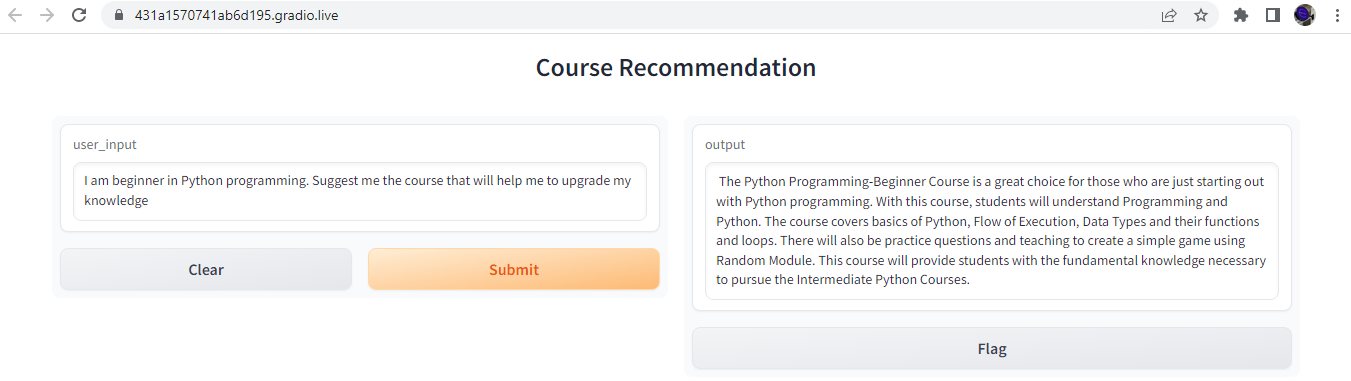